In [100]:
#기본 라이브러리들
import numpy as np   # 수치연산
import pandas as pd  # 데이터프레임(2차원) 
import matplotlib.pyplot as plt  # 그래프
import seaborn as sns

# 스케일링
from sklearn.preprocessing import *

# 데이터 분할
from sklearn.model_selection import train_test_split  

# 모델링
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC, SVR

# 검증
from sklearn.metrics import *

# 성능
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import statsmodels.api as sm

# Modeling
- 데이터로부터 패턴을 찾아 수학식으로 정리
- 오차가 적은 모델을 만드는 과정

### 목적
- 샘플을 가지고 전체를 추정

### 패턴을 찾는 방법 ( 머신러닝 알고리즘 )
	- 답이 있는 문제(지도학습) : 답을 알려주면서 패턴을 찾게하기.  
		숫자(회귀)와 범주(분류)의 답
	- 답이 없는 문제(비지도학습) : 비슷한 데이터끼리 모아서 데이터 안에서 패턴을 찾기

### 오차 : 실제 값 = 모델 + 오차
- 자료가 벗어나는 정도 ∑(실제 값 - 모델)^2




### 과정 : 데이터확인 및 전처리 -> 선언(설계) -> 학습(모델링) -> 검증(예측, 평가)

# sklearn 모델

## 회귀모델(Regression)

### 1) 데이터 확인 및 전처리

In [101]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)

In [102]:
data.drop(['black'], axis = 1, inplace = True)

In [103]:
target = 'medv'
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [104]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3)

* 스케일링

In [105]:
mm_scaler = MinMaxScaler()
st_scaler = StandardScaler()
x_train_mm = mm_scaler.fit_transform(x_train)
x_train_st = st_scaler.fit_transform(x_train)
x_val_mm = mm_scaler.fit_transform(x_val)
x_val_st = st_scaler.fit_transform(x_val)

### 2. 선언

### LinearRegression


In [106]:
linear_model = LinearRegression()


### KNeighborsRegressor
* n_neighbors
* metric

In [107]:
k = int(y_val.count() ** 0.5)
k

12

In [108]:
knn_model_e_reg = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
knn_model_m_reg = KNeighborsRegressor(n_neighbors=k, metric='manhattan')

### 3. 학습

In [109]:
linear_model.fit(x_train, y_train)
knn_model_e_reg.fit(x_train_mm, y_train)
knn_model_m_reg.fit(x_train_mm, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=12)

### 4. 예측

In [110]:
linear_pred = linear_model.predict(x_val)
knn_e_pred = knn_model_e_reg.predict(x_val_mm)
mkk_m_pred = knn_model_m_reg.predict(x_val_mm)

### 5. 검증

In [111]:
name = ['LinearRegression', 'KNeighborsRegressor_e', 'KNeighborsRegressor_m']
list_pred = [linear_pred, knn_e_pred, mkk_m_pred]

for n, p in zip(name, list_pred):
    print(n)
    print(f'r2_score : {r2_score(y_val, p)}')
    print(f'mse : {mean_squared_error(y_val, p)}')
    print(f'rmse : {mean_squared_error(y_val, p, squared=False)}')
    print(f'mae : {mean_absolute_error(y_val, p)}')
    print(f'mape : {mean_absolute_percentage_error(y_val, p)}')
    print('**' * 15)

LinearRegression
r2_score : 0.7273963091960407
mse : 18.304979148419022
rmse : 4.2784318562317925
mae : 3.199666103953315
mape : 0.1827888011385339
******************************
KNeighborsRegressor_e
r2_score : 0.7215662264830818
mse : 18.69646153143275
rmse : 4.323940509700932
mae : 3.1395285087719302
mape : 0.15990910895698046
******************************
KNeighborsRegressor_m
r2_score : 0.7432067853153842
mse : 17.243326480263157
rmse : 4.1525084563746715
mae : 2.9899671052631582
mape : 0.1535228962310915
******************************


## 분류모델(Classifier)

### 1) 데이터 확인 및 전처리

In [112]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple2.CSV"
data = pd.read_csv(path)
data

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4
...,...,...,...,...,...,...,...,...,...,...,...
1191,0,32,5,1555,Female,2,Married,5878,No,12,12
1192,0,27,19,1619,Male,1,Divorced,4066,No,11,7
1193,0,29,9,1558,Male,3,Married,2451,No,18,5
1194,0,29,2,469,Male,3,Married,4649,No,14,4


In [113]:
data.drop('EmployeeNumber', axis = 1, inplace = True)

In [114]:
target = 'Attrition'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 가변수화

In [115]:
cat_cols = ['Gender','JobSatisfaction','MaritalStatus','OverTime']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

In [116]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3)

* 스케일링

In [117]:
mm_scaler = MinMaxScaler()
st_scaler = StandardScaler()
x_train_mm = mm_scaler.fit_transform(x_train)
x_train_st = st_scaler.fit_transform(x_train)
x_val_mm = mm_scaler.fit_transform(x_val)
x_val_st = st_scaler.fit_transform(x_val)

### 2. 선언

### LogisticRegression

In [118]:
logtc_model = LogisticRegression()

In [119]:
k = int(y_val.count() ** 0.5)
k

18

### KNeighborsClassifier
* n_neighbors
* metric

In [120]:
knn_model_cla_e = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_model_cla_m = KNeighborsClassifier(n_neighbors=k, metric='manhattan')

### DecisionTree
* max_depth
* min_samples_leaf

##### 지니지수 : 얼마나 불확실한가? 불순도
 - 0 ~ 0.5 : 불확실성 0 ~ 절반의 불확실
 - Excel 파일 참고

In [121]:
dtree_model = DecisionTreeClassifier(max_depth=3)

### SVM (Support Vector Machine)
 - 선형모델(SVR)과 분류모델(SVC) 둘다 사용가능하지만 주로 분류모델에 쓰인다.
 - 두 클래스 사이에 가장 넓은 마진을 만드는게 목표이다.
 - 마진으 클수록 새로운 데이터에 대해 안정적인 분류가 가능
 - Vector : 모든 데이터 포인트
 - Decision Boundary : 모델. 클래스를 구분 하는 경계선
 - Support Vector : 결정 경계와 가까운 데이터 포인트
 - Parameter
    - kernel : 커널 함수 종류를 지정합니다. 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' 중에서 
     지정 가능하며, 기본 값은 'rbf'로 설정되어 있습니다.

    - C : regularization의 정도를 지정합니다. 값이 클 수록 오류의 허용 정도를 낮춘다.  
    기본 값은 1.0으로 설정되어있습니다. 값이 적정값 이상 커지면 overfitting 된다.

    - degree : kernel이 'poly'일 때만 유효합니다. 커널 함수를 몇차 함수로 지정할지를 결정합니다.

    - gamma : 'scale'과 'auto' 중에서 지정 가능합니다.  
    커널 함수가 'rbf', 'poly', 'sigmoid' 인 경우에 유효하며, 커널 계수를 지정하는 하이퍼파라미터입니다.

    - random_state : 다른 머신러닝 모델과 마찬가지로 seed를 지정하여 실행시마다 결과를 고정하는 역할을 수행합니다.

In [122]:
svc_model = SVC(C=10, gamma=50)

### 3. 학습

In [123]:
logtc_model.fit(x_train, y_train)
dtree_model.fit(x_train, y_train)
knn_model_cla_e.fit(x_train_mm, y_train)
knn_model_cla_m.fit(x_train_mm, y_train)
svc_model.fit(x_train_mm, y_train)


c:\Users\mskyu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(C=10, gamma=50)

### 4. 예측

In [124]:
logtc_pred = logtc_model.predict(x_val)
knn_e_pred = knn_model_cla_e.predict(x_val_mm)
knn_m_pred = knn_model_cla_m.predict(x_val_mm)
dtree_pred = dtree_model.predict(x_val)
svc_pred = svc_model.predict(x_val_mm)

### 5. 검증

In [125]:
name = ['LogisticRegression', 'KNeighborsClassifier_e', 'KNeighborsClassifier_m', 'DecisionTreeClassifier', 'SVC']
list_pred = [logtc_pred, knn_e_pred, knn_m_pred, dtree_pred, svc_pred]

for n, p in zip(name, list_pred):
    print(n)
    print(confusion_matrix(y_val, p))
    print(classification_report(y_val, p))
    print('**'*15)

LogisticRegression
[[290   6]
 [ 51  12]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       296
           1       0.67      0.19      0.30        63

    accuracy                           0.84       359
   macro avg       0.76      0.59      0.60       359
weighted avg       0.82      0.84      0.80       359

******************************
KNeighborsClassifier_e
[[293   3]
 [ 60   3]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       296
           1       0.50      0.05      0.09        63

    accuracy                           0.82       359
   macro avg       0.67      0.52      0.49       359
weighted avg       0.77      0.82      0.76       359

******************************
KNeighborsClassifier_m
[[294   2]
 [ 60   3]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       296
           1       0.60      0.05      0.

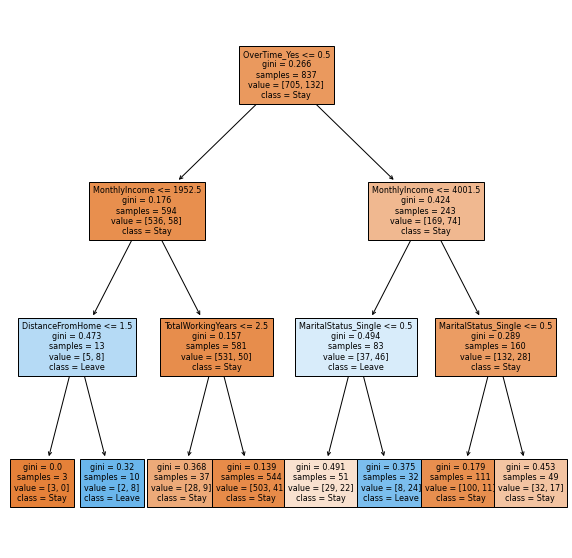

In [126]:
plt.figure(figsize=(10,10))
plot_tree(dtree_model
        , feature_names = list(x_train)
        , class_names= ['Stay', 'Leave']
        , filled = True
        , fontsize = 8)
plt.show()

# 성능 튜닝

릿지 / 랏쏘

### 변수 선택 - AIC
* 값이 작을 수록 좋은 모델

In [127]:
# 아래 함수는 로지스틱 회귀를 위한 전진선택법 함수 입니다.
import statsmodels.api as sm

def forward_stepwise_logistic(x_train, y_train):

    # 변수목록, 선택된 변수 목록, 단계별 모델과 AIC 저장소 정의
    features = list(x_train) # 컬럼명
    selected = []
    step_df = pd.DataFrame({ 'step':[], 'feature':[],'aic':[]})

    for s in range(0, len(features)) :
        result =  { 'step':[], 'feature':[],'aic':[]}

        # 변수 목록에서 변수 한개씩 뽑아서 모델에 추가
        for f in features :
            vars = selected + [f]
            x_tr = x_train[vars]
            model = sm.Logit(y_train, x_tr).fit(disp=False)
            result['step'].append(s+1)
            result['feature'].append(vars)
            result['aic'].append(model.aic)
        
        # 모델별 aic 집계
        temp = pd.DataFrame(result).sort_values('aic').reset_index(drop = True)

        # 만약 이전 aic보다 새로운 aic 가 크다면 멈추기
        if step_df['aic'].min() < temp['aic'].min() :
            break
        step_df = pd.concat([step_df, temp], axis = 0).reset_index(drop = True)

        # 선택된 변수 제거
        v = temp.loc[0,'feature'][s]
        features.remove(v)

        selected.append(v)
    
    # 선택된 변수와 step_df 결과 반환
    return selected, step_df

In [128]:
vars, result = forward_stepwise_logistic(x_train, y_train)

In [129]:
vars

['Age',
 'OverTime_Yes',
 'MaritalStatus_Single',
 'JobSatisfaction_4',
 'TotalWorkingYears',
 'JobSatisfaction_3',
 'JobSatisfaction_2',
 'DistanceFromHome',
 'Gender_Male',
 'PercentSalaryHike']

In [130]:
result.sort_values(by='aic')

,step,feature,aic
72,10.0,"[Age, OverTime_Yes, MaritalStatus_Single, JobS...",600.150594
68,9.0,"[Age, OverTime_Yes, MaritalStatus_Single, JobS...",600.695930
63,8.0,"[Age, OverTime_Yes, MaritalStatus_Single, JobS...",601.144175
69,9.0,"[Age, OverTime_Yes, MaritalStatus_Single, JobS...",601.549617
73,10.0,"[Age, OverTime_Yes, MaritalStatus_Single, JobS...",601.586989
...,...,...,...
7,1.0,[JobSatisfaction_4],986.832670
8,1.0,[JobSatisfaction_3],1034.100656
9,1.0,[JobSatisfaction_2],1080.654609
10,1.0,[MaritalStatus_Single],1100.907595


### 하이퍼파라미터 튜닝

### 1. Ramdom Search

In [131]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [132]:
params = { 'n_neighbors' : range(1,51), 'metric' : ['euclidean', 'manhattan']  }
params

{'n_neighbors': range(1, 51), 'metric': ['euclidean', 'manhattan']}

In [133]:
model = KNeighborsClassifier()

model_rs = RandomizedSearchCV(model
                            , params
                            , cv=5
                            , n_iter=5
                            )

In [134]:
model_rs.fit(x_train_mm, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': range(1, 51)})

In [135]:
model_rs.cv_results_

{'mean_fit_time': array([0.00179715, 0.00119267, 0.00119753, 0.0011991 , 0.00099392]),
 'std_fit_time': array([4.00085227e-04, 4.01037076e-04, 3.98374585e-04, 3.98417937e-04,
        9.07294690e-06]),
 'mean_score_time': array([0.00657706, 0.00738797, 0.00638266, 0.00657511, 0.00658569]),
 'std_score_time': array([0.00049233, 0.0004895 , 0.0004912 , 0.00048352, 0.00049216]),
 'param_n_neighbors': masked_array(data=[19, 25, 43, 21, 45],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_metric': masked_array(data=['manhattan', 'euclidean', 'manhattan', 'euclidean',
                    'euclidean'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 19, 'metric': 'manhattan'},
  {'n_neighbors': 25, 'metric': 'euclidean'},
  {'n_neighbors': 43, 'metric': 'manhattan'},
  {'n_neighbors': 21, 'metric': 'euclidean'},
  {'n_neighbors': 45, 'metri

In [136]:
model_rs.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=45)

In [137]:
model_rs.best_params_

{'n_neighbors': 45, 'metric': 'euclidean'}

In [138]:
model_rs.best_score_

0.8446891930424865

In [139]:
pred = model_rs.predict(x_val_mm)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       296
           1       0.00      0.00      0.00        63

    accuracy                           0.82       359
   macro avg       0.41      0.50      0.45       359
weighted avg       0.68      0.82      0.75       359



c:\Users\mskyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mskyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mskyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
params = {'max_depth' : range(1,11)
          , 'min_samples_leaf' : range(10,101,10)}

In [141]:
model = DecisionTreeClassifier()
model_r = RandomizedSearchCV(model
                             , params
                             , cv=5
                             , n_iter=20)


In [142]:
model_r.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'max_depth': range(1, 11),
                                        'min_samples_leaf': range(10, 101, 10)})

In [143]:
df = pd.DataFrame(model_r.cv_results_)[['param_max_depth', 'param_min_samples_leaf', 'mean_test_score']]
df['param_max_depth'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   param_max_depth         20 non-null     object 
 1   param_min_samples_leaf  20 non-null     object 
 2   mean_test_score         20 non-null     float64
dtypes: float64(1), object(2)
memory usage: 608.0+ bytes


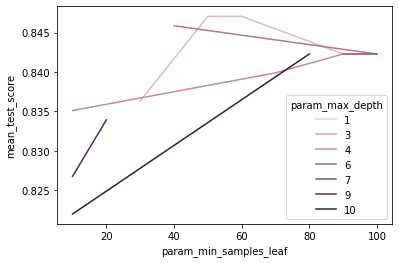

In [144]:
sns.lineplot(data=df, x='param_min_samples_leaf', y='mean_test_score', hue='param_max_depth')
plt.show()

In [145]:
model_r.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=60)

In [146]:
model_r.best_params_

{'min_samples_leaf': 60, 'max_depth': 2}

In [147]:
model_r.best_score_

0.8470844026233249

In [148]:
pred = model_r.predict(x_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       296
           1       0.51      0.32      0.39        63

    accuracy                           0.83       359
   macro avg       0.69      0.63      0.65       359
weighted avg       0.80      0.83      0.81       359



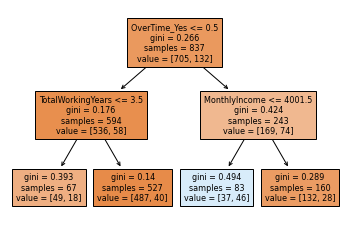

In [149]:
plot_tree(model_r.best_estimator_
            , feature_names = list(x_train)
            , filled = True
            , fontsize=8
            )
plt.show()

### 2. Grid Search

In [150]:
params = { 'n_neighbors' : range(3,31,2), 'metric' : ['euclidean', 'manhattan']  }
params

{'n_neighbors': range(3, 31, 2), 'metric': ['euclidean', 'manhattan']}

In [151]:
model = KNeighborsClassifier()
model_gs = GridSearchCV(model, params, cv=5)

In [152]:
model_gs.fit(x_train_mm, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(3, 31, 2)})

In [153]:
df = pd.DataFrame(model_gs.cv_results_)[['param_metric', 'param_n_neighbors', 'mean_test_score']]

df['param_n_neighbors'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   param_metric       28 non-null     object 
 1   param_n_neighbors  28 non-null     object 
 2   mean_test_score    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


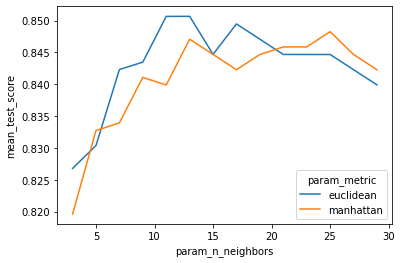

In [154]:
sns.lineplot(data=df, x='param_n_neighbors', y='mean_test_score', hue='param_metric')
plt.show()

In [155]:
model_gs.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [156]:
model_gs.best_params_

{'metric': 'euclidean', 'n_neighbors': 13}

In [157]:
model_gs.best_score_

0.8506772169945822

In [158]:
pred = model_gs.predict(x_val_mm)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       296
           1       0.57      0.06      0.11        63

    accuracy                           0.83       359
   macro avg       0.70      0.53      0.51       359
weighted avg       0.79      0.83      0.77       359



In [159]:
params =  {'max_depth' : range(1,11)
           , 'min_samples_leaf' : range(10,101,10)}

In [160]:
model_decision = DecisionTreeClassifier()
model_grid = GridSearchCV(model_decision, params, cv=5)

In [161]:
model_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(10, 101, 10)})

In [162]:
model_grid.cv_results_

{'mean_fit_time': array([0.00219378, 0.00238814, 0.00200143, 0.00160637, 0.00180106,
        0.00279169, 0.00198784, 0.00199418, 0.00179625, 0.00199094,
        0.00238991, 0.00179615, 0.00219355, 0.00259476, 0.00159612,
        0.00179787, 0.00181885, 0.00179162, 0.00139747, 0.00159903,
        0.0009975 , 0.00179687, 0.00196996, 0.0019949 , 0.0017983 ,
        0.00179887, 0.0012002 , 0.00179543, 0.00179605, 0.0019362 ,
        0.00179501, 0.00199547, 0.00199203, 0.00200262, 0.00160356,
        0.00179081, 0.00179253, 0.00198588, 0.00159903, 0.00159378,
        0.00200229, 0.00218725, 0.00183344, 0.00219374, 0.00199518,
        0.00177946, 0.00159693, 0.00179486, 0.00173521, 0.0012054 ,
        0.00240941, 0.00219431, 0.00219436, 0.00219412, 0.00199494,
        0.00139623, 0.00199399, 0.00199513, 0.00160542, 0.00178633,
        0.00239272, 0.00199466, 0.0019948 , 0.00199475, 0.00159593,
        0.00159526, 0.00219374, 0.0015955 , 0.00199556, 0.00139866,
        0.00259247, 0.00199628,

In [163]:
model_grid.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=50)

In [164]:
model_grid.best_params_

{'max_depth': 2, 'min_samples_leaf': 50}

In [165]:
model_grid.best_score_

0.8470844026233249

In [166]:
pred = model_grid.predict(x_val)
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       296
           1       0.51      0.32      0.39        63

    accuracy                           0.83       359
   macro avg       0.69      0.63      0.65       359
weighted avg       0.80      0.83      0.81       359



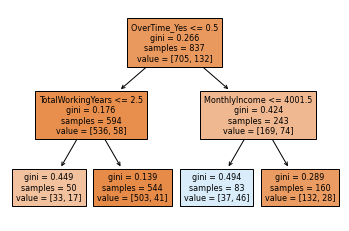

In [167]:
plot_tree(model_grid.best_estimator_
        , feature_names = list(x_train)
        , filled = True
        , fontsize=8
        )
plt.show()

### 일반화 성능 - 성능의 평균
* 모델링은 데이터의 부분집합을 학습하여 모집단을 예측
* train 데이터를 랜덤으로 추출하여 학습하기 때문에 분할되는 데이터에 따라 정확도가 달라짐


### 1. 모델링 반복을 통해 평균 성능 측정

In [168]:
result = []
for i in range(100):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3)

    model = DecisionTreeClassifier(max_depth = 3)
    model.fit(x_train, y_train)
    pred = model.predict(x_val)
    result.append(accuracy_score(y_val, pred))

In [169]:
np.mean(result), np.std(result)

(0.8400835654596099, 0.016796888351447173)

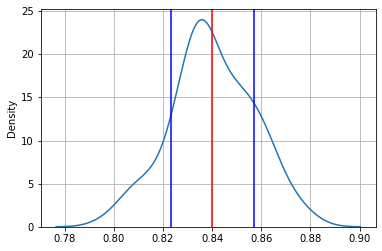

In [170]:
sns.kdeplot(result)
plt.axvline(np.mean(result), color = 'r')
plt.axvline(np.mean(result) + np.std(result), color = 'b')
plt.axvline(np.mean(result) - np.std(result), color = 'b')
plt.grid()
plt.show()


### 2. k-fold cross validation

In [171]:
from sklearn.model_selection import cross_val_score

In [172]:
model = DecisionTreeClassifier(max_depth=2, min_samples_leaf=20)

In [173]:
# cv : cross val
dt_result = cross_val_score(model, x, y, cv=10)
print(dt_result)
print(dt_result.mean(), dt_result.std())

[0.84166667 0.81666667 0.85       0.81666667 0.825      0.8
 0.8487395  0.83193277 0.83193277 0.83193277]
0.8294537815126051 0.014751469956440336


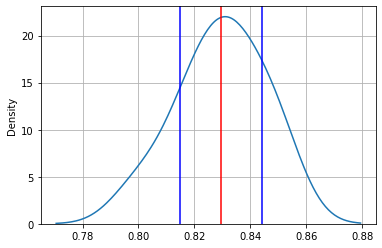

In [174]:
sns.kdeplot(dt_result)
plt.axvline(np.mean(dt_result), color = 'r')
plt.axvline(np.mean(dt_result) + np.std(dt_result), color = 'b')
plt.axvline(np.mean(dt_result) - np.std(dt_result), color = 'b')
plt.grid()
plt.show()


### 일반화 성능 - 데이터 늘리기
* train 데이터 크기에 따른 모델의 성능
* 일정 크기 이상의 데이터에서 성능 개선 효과가 줄어들고 처리 속도가 느려짐
* variance(성능의 편차)와 bias(오차)를 줄여야 한다.
* train_sizes 최대 크기 : 전체 데이터 크기 - (전체 데이터 크기 / cv)

In [175]:
from sklearn.model_selection import learning_curve

In [176]:
x.shape

(1196, 12)

In [177]:
model = DecisionTreeClassifier(max_depth=2, min_samples_leaf=20)

In [178]:
# 데이터 양이 많을 수록 시간이 오래 걸립니다.
tr_size, tr_scores, val_scores = learning_curve(model, x, y
                                                , train_sizes = range(5, 900, 10)
                                                , cv = 5)

In [179]:
tr_size

array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
       135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255,
       265, 275, 285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385,
       395, 405, 415, 425, 435, 445, 455, 465, 475, 485, 495, 505, 515,
       525, 535, 545, 555, 565, 575, 585, 595, 605, 615, 625, 635, 645,
       655, 665, 675, 685, 695, 705, 715, 725, 735, 745, 755, 765, 775,
       785, 795, 805, 815, 825, 835, 845, 855, 865, 875, 885, 895])

In [180]:
tr_scores_mean = tr_scores.mean(axis = 1)
tr_scores_std = tr_scores.std(axis = 1)
tr_scores_mean, tr_scores_std

(array([0.76      , 0.78666667, 0.76      , 0.76571429, 0.79111111,
        0.8       , 0.82461538, 0.82666667, 0.80705882, 0.79789474,
        0.79238095, 0.79478261, 0.8352    , 0.84      , 0.84275862,
        0.82064516, 0.82666667, 0.83085714, 0.8227027 , 0.82051282,
        0.8204878 , 0.81488372, 0.82222222, 0.83148936, 0.82857143,
        0.83215686, 0.83396226, 0.82545455, 0.84631579, 0.84881356,
        0.83868852, 0.83555556, 0.83938462, 0.83820896, 0.85623188,
        0.83661972, 0.83835616, 0.84      , 0.86077922, 0.8643038 ,
        0.86271605, 0.85831325, 0.85552941, 0.85287356, 0.85303371,
        0.85274725, 0.8511828 , 0.85136842, 0.84948454, 0.84888889,
        0.85108911, 0.84970874, 0.84952381, 0.85233645, 0.85174312,
        0.85225225, 0.85415929, 0.85495652, 0.85538462, 0.85781513,
        0.85652893, 0.85723577, 0.85664   , 0.85700787, 0.85860465,
        0.85984733, 0.85172932, 0.84977778, 0.85459854, 0.85438849,
        0.85446809, 0.85426573, 0.85655172, 0.85

In [181]:
val_scores[:10]

array([[0.8375    , 0.83682008, 0.83682008, 0.83682008, 0.83682008],
       [0.8375    , 0.83682008, 0.83682008, 0.83682008, 0.83682008],
       [0.8375    , 0.83682008, 0.83682008, 0.83682008, 0.83682008],
       [0.8375    , 0.83682008, 0.83682008, 0.83682008, 0.83682008],
       [0.8375    , 0.83682008, 0.83682008, 0.83682008, 0.83682008],
       [0.8375    , 0.83682008, 0.83682008, 0.83682008, 0.83682008],
       [0.8375    , 0.83682008, 0.83682008, 0.83682008, 0.83682008],
       [0.8375    , 0.83682008, 0.83682008, 0.83682008, 0.83682008],
       [0.8375    , 0.83682008, 0.83682008, 0.83682008, 0.83682008],
       [0.8375    , 0.83682008, 0.83682008, 0.83682008, 0.83682008]])

In [182]:

val_scores_mean = val_scores.mean(axis = 1)
val_scores_std = val_scores.std(axis = 1)
val_scores_mean, val_scores_std

(array([0.83695607, 0.83695607, 0.83695607, 0.83695607, 0.83695607,
        0.83695607, 0.83695607, 0.83695607, 0.83695607, 0.83695607,
        0.83695607, 0.83695607, 0.8135251 , 0.8135251 , 0.8135251 ,
        0.78172594, 0.76669456, 0.77924686, 0.78674686, 0.78674686,
        0.78674686, 0.83695607, 0.83695607, 0.8377894 , 0.8377894 ,
        0.83695258, 0.83695258, 0.83611925, 0.84197699, 0.83946653,
        0.81437587, 0.81939331, 0.83442817, 0.82776151, 0.83780335,
        0.82859484, 0.81604603, 0.81520921, 0.83612971, 0.83612971,
        0.84198745, 0.83947699, 0.84197699, 0.84030335, 0.83946653,
        0.83779289, 0.83779289, 0.83779289, 0.83779289, 0.83695607,
        0.83862971, 0.83695607, 0.83695607, 0.83779289, 0.83779289,
        0.83779289, 0.83779289, 0.83779289, 0.84030335, 0.84114017,
        0.84114017, 0.84363668, 0.83529289, 0.83529289, 0.83529289,
        0.83695955, 0.83613668, 0.83613668, 0.83446304, 0.83446304,
        0.84030683, 0.84030683, 0.84030683, 0.83

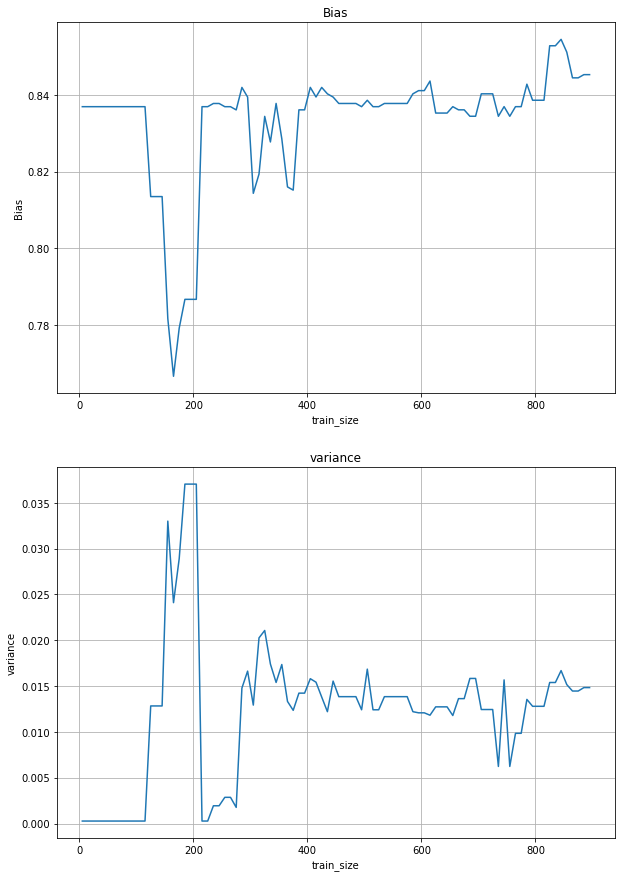

In [183]:
plt.figure(figsize = (10,15))
plt.subplot(2,1,1)
plt.plot(tr_size, val_scores_mean)
plt.ylabel('Bias')
plt.xlabel('train_size')
plt.title('Bias')
plt.grid()

plt.subplot(2,1,2)
plt.plot(tr_size, val_scores_std)
plt.ylabel('variance')
plt.xlabel('train_size')
plt.title('variance')
plt.grid()
plt.show()

### 모델 복잡도
 - 변수가 많아 질수록 정확도는 향상되지만 복잡도가 높아진다
 - 모델의 복잡도가 높아지면 이상치에 데이터 전체의 특성이나 데이터의 패턴을 가질수 없다.  
 (성능이 떨어진다)
 - KNN 모델의 복잡도 : n_neighbors가 작을수록 복잡
 - Tree 모델의 복잡도 : max_depth가 클수록, min_samples_leaf가 작을수록
 - SVM 모델의 복잡도 : C, gamma가 클수록 복잡

In [184]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [185]:
# 데이터분할1
target = 'Sales'
x = data.drop(target, axis=1)
y = data.loc[:, target]

# 가변수화
dumm_cols = ['ShelveLoc','Education','Urban', 'US']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

# 데이터 분할2
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2
                                                  , random_state = 2022)

# 스케일링
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

##### KNN 모델 복잡도
* 가장 단순한 모델(평균모델)
    * knn : k를 최대로 크게하면 평균 모델이 됨.
    * k의 최대값은 학습 데이터의 행 수

In [186]:
n = x_train_s.shape[0]
model = KNeighborsRegressor(n_neighbors =n) # train set의 행 수
model.fit(x_train_s, y_train)
pred_train = model.predict(x_train_s)

In [187]:
# 결과 plotting
def reg_plot(y, pred, title='') :
    plt.scatter(y, pred)
    lin_x = np.linspace(y.min(), y.max(), 20)
    plt.plot(lin_x, lin_x, color = 'gray')

    plt.title(title)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid()
    plt.show()

y_train 의 평균 :  7.591281250000004


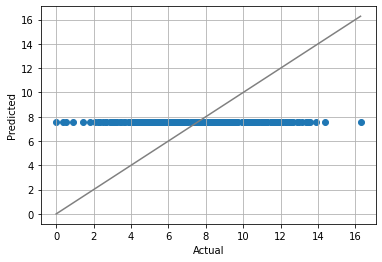

In [188]:
print('y_train 의 평균 : ', y_train.mean())
reg_plot(y_train, pred_train)
# y_train.mean()

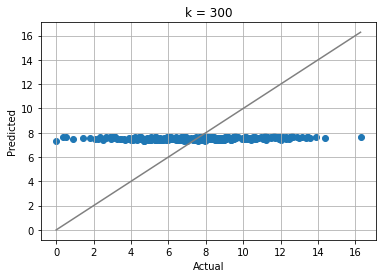

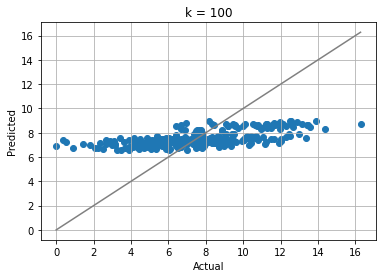

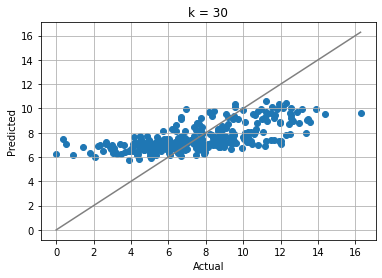

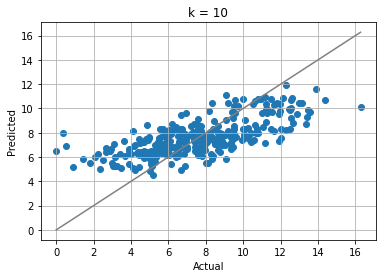

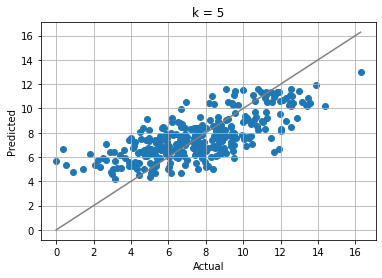

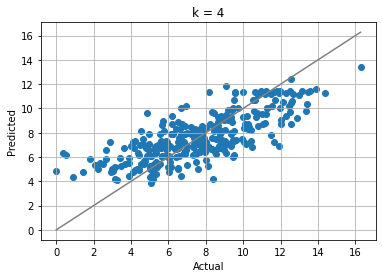

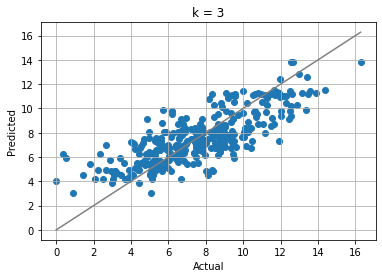

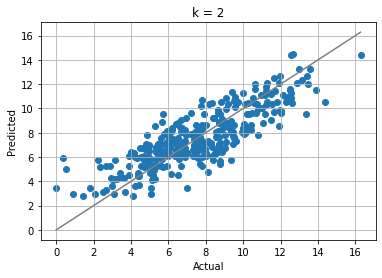

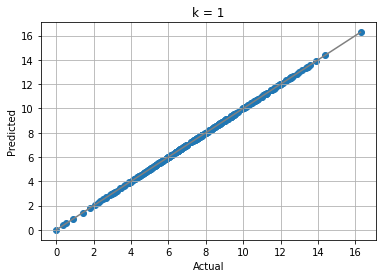

In [189]:
# 아래 90의 숫자를 줄여가며 모델링을 수행해 봅시다.
for n in [300,100,30,10,5,4,3,2,1] :
    model = KNeighborsRegressor(n_neighbors = n) # train set의 행 수
    model.fit(x_train_s, y_train)
    pred = model.predict(x_train_s)

    # 결과 plotting
    reg_plot(y_train, pred, f'k = {n}')
    plt.show()

##### Decision Tree 복잡도

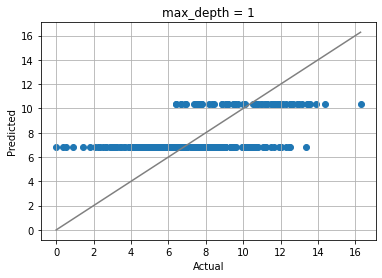

0.8816664821105107


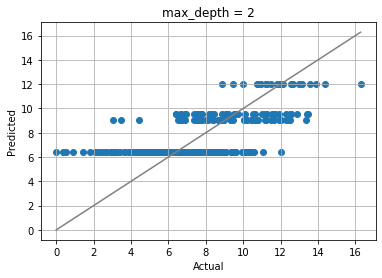

0.7950759917015487


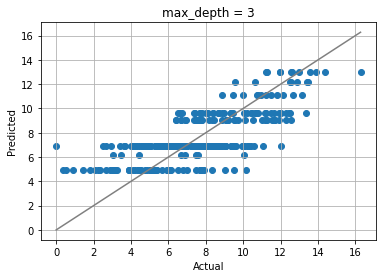

0.8088587764714109


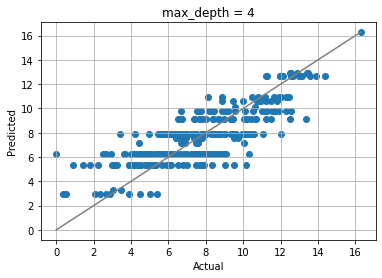

0.776068178669671


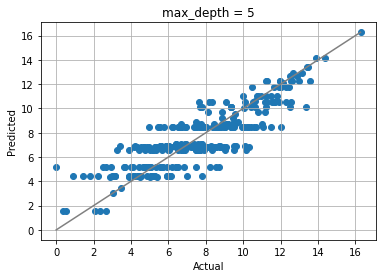

0.6727584271987087


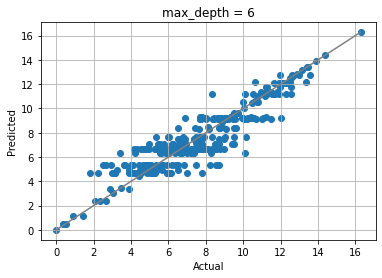

0.6774780723706171


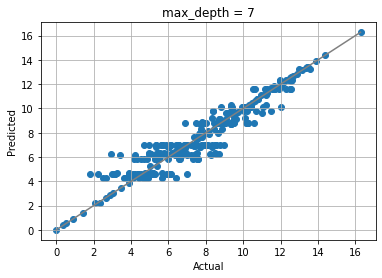

0.6064429147109025


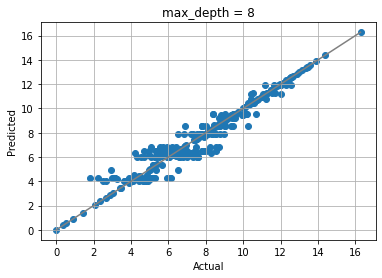

0.5872864046090729


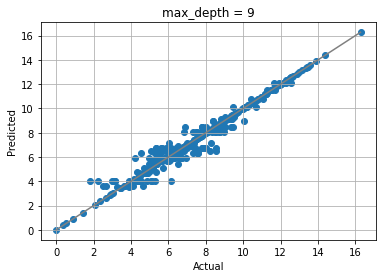

0.6284485410169366


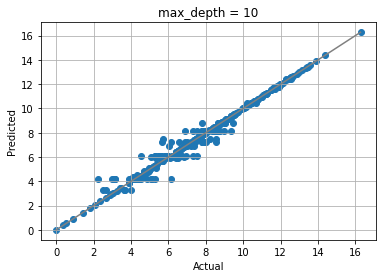

0.6353224474610542


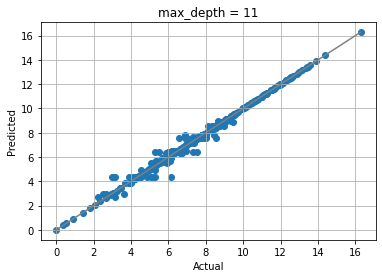

0.6481702227945457


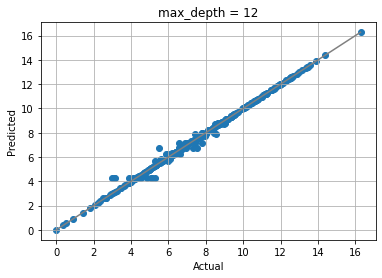

0.6616176728657338


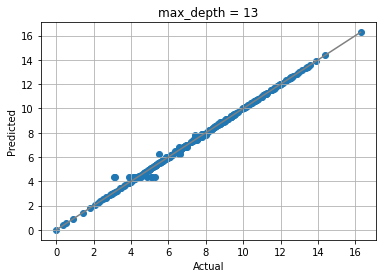

0.6294013685022877


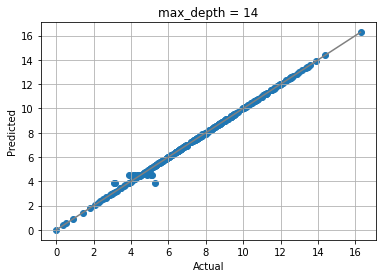

0.6661275879133842


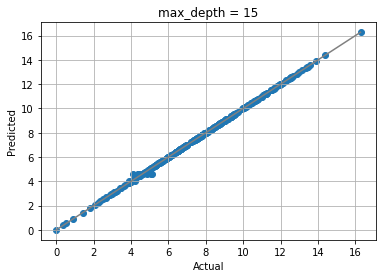

0.6390509920186977


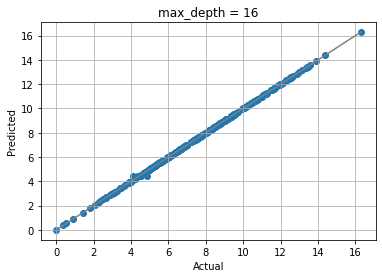

0.649113224593461


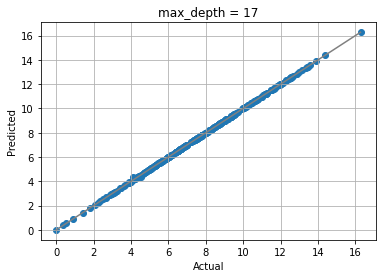

0.6198786567641712


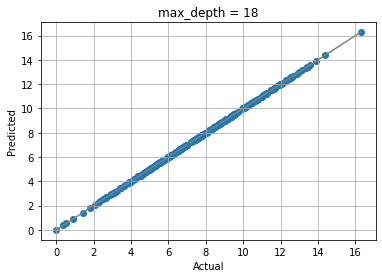

0.6355626142589232


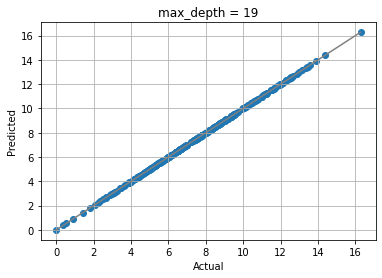

0.6695816160830332


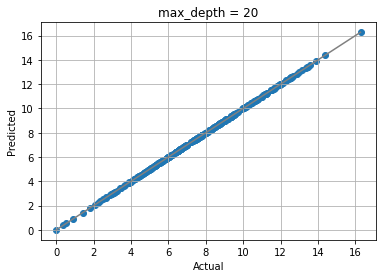

0.6298346916961146


In [210]:
val = []
train = []
depth = list(range(1,21))
for n in range(1,21):
    model = DecisionTreeRegressor(max_depth=n) # train set의 행 수
    model.fit(x_train, y_train)
    pred = model.predict(x_train)
    pred_val = model.predict(x_val)

    # 결과 plotting
    reg_plot(y_train, pred, f'max_depth = {n}')
    plt.show()
    print(mean_absolute_percentage_error(y_val, pred_val))
    val.append(mean_absolute_percentage_error(y_val, pred_val))
    train.append(mean_absolute_percentage_error(y_train, pred))


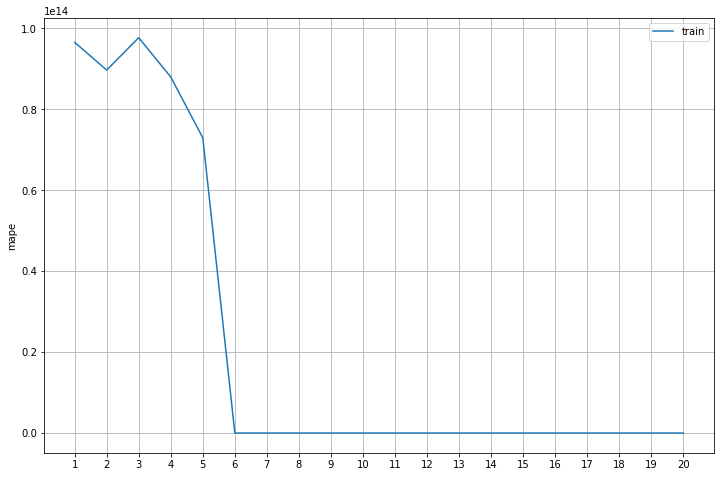

In [213]:
plt.figure(figsize=(12,8))
# plt.plot(depth, val, label='val')
plt.plot(depth, train, label='train')
plt.xticks(range(1,21))
plt.grid()
plt.ylabel('mape')
plt.legend()
plt.show()

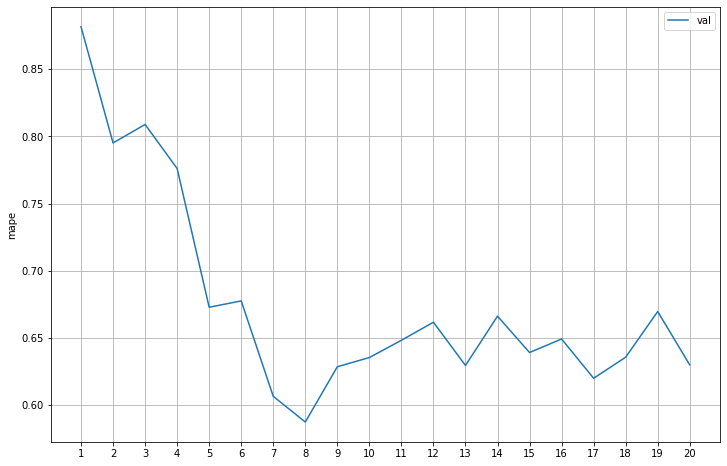

In [214]:
plt.figure(figsize=(12,8))
plt.plot(depth, val, label='val')
# plt.plot(depth, train, label='train')
plt.xticks(range(1,21))
plt.grid()
plt.ylabel('mape')
plt.legend()
plt.show()

In [250]:
# mobile data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv"
data = pd.read_csv(path)
data = data.sample(5000, random_state = 2022)
data.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
data['CHURN'] = data['CHURN'].map({'LEAVE':1, 'STAY':0})
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
3178,0,119512,51,31,248566,229,2,very_sat,considering,1
14926,1,142144,192,15,774317,581,4,unsat,never_thought,1
15116,1,142308,0,79,306426,497,1,sat,considering,0
12733,1,113385,0,0,333599,819,6,very_unsat,considering,1
14032,1,90348,209,10,637286,360,4,unsat,actively_looking_into_it,0


In [251]:
# 데이터분할1
target = 'CHURN'
x = data.drop(target, axis=1)
y = data.loc[:, target]

# 가변수화
dumm_cols = ['REPORTED_SATISFACTION','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

# 데이터 분할2
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2
                                                  , random_state = 2022)

# 스케일링
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

In [252]:
result_train = [] # train set을 가지고 예측한 결과
result_val = [] # val set을 가지고 예측한 결과
depth = list(range(1,21))

for d in depth :
    model = DecisionTreeClassifier(max_depth = d)
    model.fit(x_train, y_train)
    pred_tr, pred_val = model.predict(x_train), model.predict(x_val)
    result_train.append(accuracy_score(y_train, pred_tr))
    result_val.append(accuracy_score(y_val, pred_val))

In [253]:
pd.DataFrame({'max_depth': list(range(1,21)),'train_acc':result_train, 'val_acc':result_val})

,max_depth,train_acc,val_acc
0,1,0.61750,0.627
1,2,0.65400,0.679
2,3,0.69475,0.697
3,4,0.70775,0.690
4,5,0.72100,0.691
5,6,0.73700,0.682
6,7,0.75100,0.667
7,8,0.77050,0.675
8,9,0.79050,0.666
9,10,0.81725,0.657


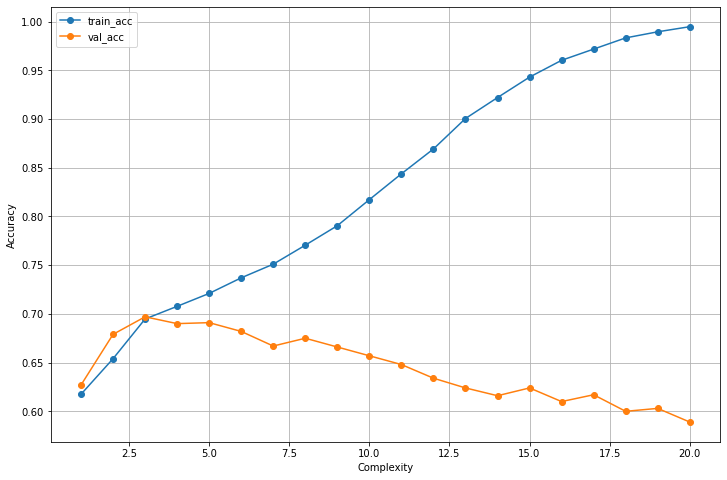

In [254]:
plt.figure(figsize = (12,8))
plt.plot(depth, result_train, label = 'train_acc', marker = 'o')
plt.plot(depth, result_val, label = 'val_acc', marker = 'o')

plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# 앙상블(Ensemble)
* 다양한 학습 알고리즘을 결합하여 학습 시키는 머신 러닝

### Bagging

* 주로 variance(편차)를 줄이는데 집중됨
* Train Data에서 복원추출 방식으로 랜덤 샘플링하여 각 샘프을 대상으로 모델을 생성하여 평균을 계산
* Row와 Feature르 각 각 랜덤 선정
* RandomForestClassifier / RandomForestRegressor
    - n_estimators : 결정트리의 갯수를 지정
        - Default = 10
        - 무작정 트리 갯수를 늘리면 성능 좋아지는 것 대비 시간이 걸릴 수 있음
    - min_samples_split	: 노드를 분할하기 위한 최소한의 샘플 데이터수
        → 과적합을 제어하는데 사용
        - Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가
    - min_samples_leaf : 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
        - min_samples_split과 함께 과적합 제어 용도
        - 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요
    - max_features : 최적의 분할을 위해 고려할 최대 feature 개수
        - Default = 'auto' (결정트리에서는 default가 none이었음)
        - int형으로 지정 →피처 갯수 / float형으로 지정 →비중
        - sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정
        - log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정
    - max_depth	: 트리의 최대 깊이
        - default = None → 완벽하게 클래스 값이 결정될 때 까지 분할  
    또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할
        - 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요
    - max_leaf_nodes :리프노드의 최대 개수

In [255]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [256]:
params = {
    'n_estimators':range(10,201,10)
    , 'max_depth':range(2,11,2)
}

In [258]:
# 모델 선언
model = RandomForestClassifier()
grid_ran = GridSearchCV(model,params,cv=5)
grid_ran.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 11, 2),
                         'n_estimators': range(10, 201, 10)})

In [259]:
grid_ran.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=150)

In [260]:
grid_ran.best_score_

0.6992499999999999

In [261]:
df = pd.DataFrame(grid_ran.cv_results_)[['param_max_depth', 'param_n_estimators', 'mean_test_score']]
df

,param_max_depth,param_n_estimators,mean_test_score
0,2,10,0.66800
1,2,20,0.67875
2,2,30,0.66850
3,2,40,0.68225
4,2,50,0.67500
...,...,...,...
95,10,160,0.69325
96,10,170,0.69700
97,10,180,0.69275
98,10,190,0.69575


In [262]:
pred = grid_ran.predict(x_val)

In [263]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72       516
           1       0.70      0.69      0.70       484

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000



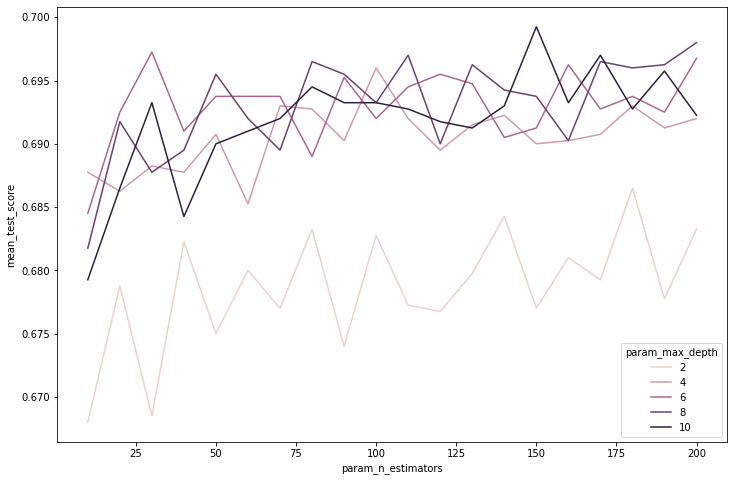

In [264]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x='param_n_estimators', y='mean_test_score', hue='param_max_depth')
plt.show()

### Boosting
* 주로 bias(오차)를 줄이는데 집중함
* 순차학습법으로 모델링 후 해당 모델의 틀린 부분을 다시 모델링하여 오차를 줄여나가는 방법
* XGBClassifier
* paramer
    - n_estimator : 재학습 회수
    - max_features : feature의 최대 개수
    - max_depth : 트리의 최대 깊이
    - min_samples_leaf : 노드의 최소 샘플
    - min_samples_split : 노듸의 최소 분할

In [265]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [272]:
model = XGBClassifier(n_estimators=5)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [273]:
pred = model.predict(x_val)

In [274]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       516
           1       0.69      0.68      0.68       484

    accuracy                           0.70      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.70      0.70      0.70      1000



In [275]:
model_gbc = GradientBoostingClassifier(n_estimators=5)
model_gbc.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=5)

In [276]:
pred_gbc = model_gbc.predict(x_val)

In [277]:
print(classification_report(y_val, pred_gbc))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       516
           1       0.73      0.61      0.67       484

    accuracy                           0.70      1000
   macro avg       0.71      0.70      0.70      1000
weighted avg       0.71      0.70      0.70      1000

